### Difusión Generativa: Entrenamiento y Generación con MNIST a Color
Este notebook demuestra cómo utilizar el framework de difusión generativa para:
1. Cargar y preparar un dataset MNIST a color
2. Configurar modelo de difusión
3. Entrenar modelo de difusion
4. Generar imágenes de dígitos a color de una clase específica
5. Generar imágenes de dígitos a color de una clase específica con imputación
---

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Añadir raíz del proyecto al path

In [2]:
# Importar componentes del framework de difusión
from generative_diffusion.utils import *
from generative_diffusion.diffusion import ModelFactory
from generative_diffusion.score_networks import ScoreNet

In [3]:
# Configurar parámetros
BATCH_SIZE = 32
N_EPOCHS = 10
LR = 1e-3

### 1. Cargar y preparar un dataset MNIST a color

Preparando dataset MNIST a color...


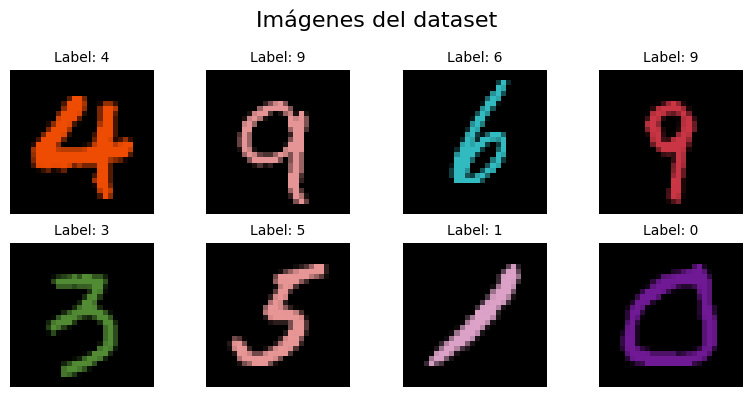

In [4]:
print("Preparando dataset MNIST a color...")
data_manager = DatasetManager(root_dir="../data")
# Crear dataset MNIST a color
mnist_train_dataset = data_manager.mnist()
# Crear dataloaders
train_dataloader = data_manager.get_dataloader(dataset=mnist_train_dataset, batch_size=BATCH_SIZE)
# Visualizar un batch de imágenes
show_images(train_dataloader, n_images=8, title="Imágenes del dataset")

### 2. Configurar el modelo de difusión

In [5]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name='euler_maruyama'
)

2025-04-21 10:50:40,534 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


### 3. Entrenar el modelo

2025-04-21 10:50:40,623 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-04-21 10:50:40,626 — DiffusionModel — INFO — Iniciando entrenamiento por 10 epochs


Entrenando el modelo por 10 epochs...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 10:51:50,173 — DiffusionModel — INFO — Epoch 1/10, Loss: 234.162013


Epoch 1, Loss: 234.162013


Epoch 2/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 10:52:48,278 — DiffusionModel — INFO — Epoch 2/10, Loss: 78.679980


Epoch 2, Loss: 78.679980


Epoch 3/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 10:53:44,950 — DiffusionModel — INFO — Epoch 3/10, Loss: 62.446027


Epoch 3, Loss: 62.446027


Epoch 4/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 10:54:42,161 — DiffusionModel — INFO — Epoch 4/10, Loss: 54.568730


Epoch 4, Loss: 54.568730


Epoch 5/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 10:55:39,179 — DiffusionModel — INFO — Epoch 5/10, Loss: 50.164239


Epoch 5, Loss: 50.164239


Epoch 6/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 10:56:36,770 — DiffusionModel — INFO — Epoch 6/10, Loss: 46.982222


Epoch 6, Loss: 46.982222


Epoch 7/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 10:57:36,072 — DiffusionModel — INFO — Epoch 7/10, Loss: 44.404660


Epoch 7, Loss: 44.404660


Epoch 8/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 10:58:34,372 — DiffusionModel — INFO — Epoch 8/10, Loss: 42.763872


Epoch 8, Loss: 42.763872


Epoch 9/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 10:59:33,742 — DiffusionModel — INFO — Epoch 9/10, Loss: 41.525362


Epoch 9, Loss: 41.525362


Epoch 10/10:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 11:00:34,676 — DiffusionModel — INFO — Epoch 10/10, Loss: 40.587626
2025-04-21 11:00:34,799 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints/checkpoint_epoch_10.pt
2025-04-21 11:00:34,832 — DiffusionModel — INFO — Modelo final guardado en ../checkpoints/model_final.pt


Epoch 10, Loss: 40.587626


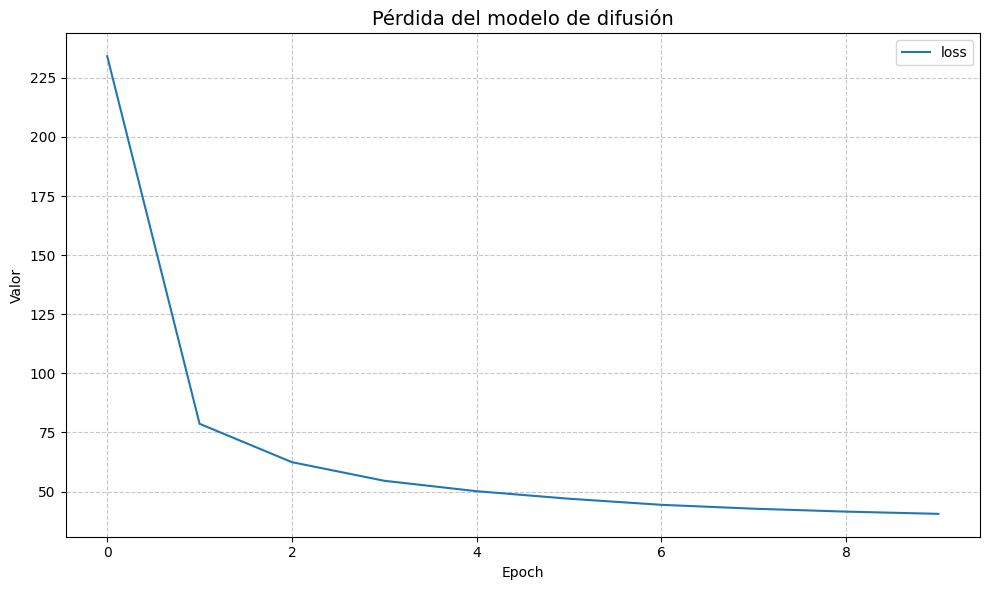

In [6]:
print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# Función para mostrar el progreso del entrenamiento
def training_callback(model, epoch, history):
    print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# Entrenar el modelo
training_history = diffusion_model.train(
    dataloader=train_dataloader,
    n_epochs=N_EPOCHS,
    lr=LR,
    checkpoint_interval=10,
    callback=training_callback
)
plot_training_history(training_history, title="Pérdida del modelo de difusión")

### 4. Generar imágenes del dígito especificado

In [7]:
# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model.load_score_model("../checkpoints/model_final.pt")

2025-04-21 11:00:35,298 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/model_final.pt
2025-04-21 11:00:35,354 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-04-21 11:00:35,357 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-04-21 11:00:35,363 — DiffusionModel — INFO — Modelo cargado correctamente


In [8]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 8
N_STEPS = 500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

2025-04-21 11:02:58,648 — DiffusionModel — INFO — Generando 8 muestras con 500 pasos


Generando imágenes del dígito 0...


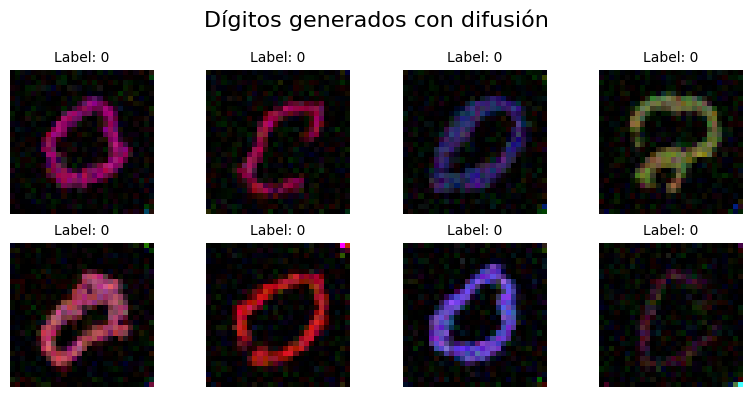

In [17]:
print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images = diffusion_model.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images, title="Dígitos generados con difusión", labels=condition)

In [10]:
# Evaluar calidad con las métricas implementadas
metrics = diffusion_model.evaluate(
    generated_samples=generated_images,
    real_dataloader=train_dataloader,
    metrics=["fid", "is", "bpd"],
    batch_size=BATCH_SIZE,
)
print("\nResultados de calidad:")
print(f"FID: {metrics['fid']:.4f} (menor es mejor)")
print(f"Inception Score: {metrics['is']:.4f} (mayor es mejor)")
print(f"Bits per Dimension: {metrics['bpd']:.4f} (menor es mejor)")

2025-04-21 11:00:39,527 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-04-21 11:00:39,751 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

2025-04-21 11:01:00,954 — DiffusionModel — INFO — FID: 215.8234 (menor es mejor)
2025-04-21 11:01:00,957 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/1 [00:00<?, ?it/s]

2025-04-21 11:01:01,851 — DiffusionModel — INFO — Inception Score: 1.0000 (mayor es mejor)
2025-04-21 11:01:01,852 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/1 [00:00<?, ?it/s]

2025-04-21 11:01:02,025 — DiffusionModel — INFO — BPD: 3.1700 (menor es mejor)



Resultados de calidad:
FID: 215.8234 (menor es mejor)
Inception Score: 1.0000 (mayor es mejor)
Bits per Dimension: 3.1700 (menor es mejor)


### 5. Generar imágenes de dígitos a color de una clase específica con imputación

2025-04-21 11:01:02,115 — DiffusionModel — INFO — Generando 8 muestras con 500 pasos


Imputando las imágenes enmascaradas...


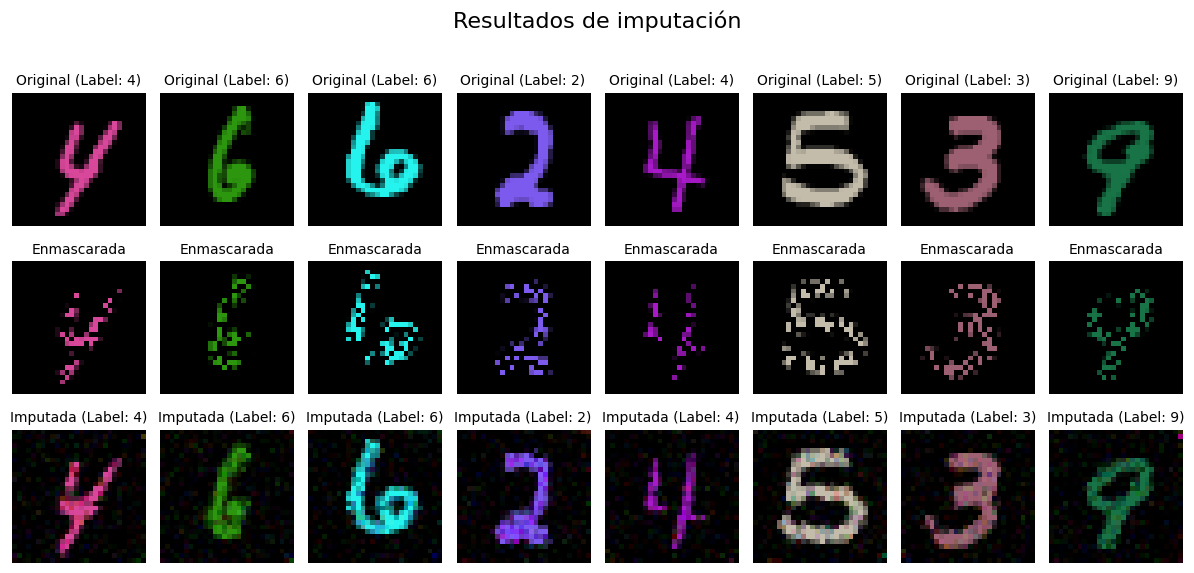

In [11]:
from generative_diffusion.controllable import random_mask

# Obtener un batch de imágenes del dataloader
images, labels = next(iter(train_dataloader))
images = images[:N_SAMPLES]
labels = labels[:N_SAMPLES]

# mask = center_square_mask(images, keep_ratio=0.4)
# mask = border_mask(images, border_ratio=0.3)
mask = random_mask(images, prob=0.4)

print("Imputando las imágenes enmascaradas...")
# Realizar la imputación
imputed_images = diffusion_model.impute(
    image=images,
    mask=mask,
    condition=labels,
)

# Mostrar resultados de imputación
show_imputation_results(images, mask, imputed_images, original_labels=labels, imputed_labels=labels)